In [1]:
pip install --upgrade seaborn numpy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 72.4 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.12.0 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.
dask-cudf 23.12.0 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.
numba 0.57.1+1.gb7ee25572 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm

In [3]:
df = pd.read_csv("./DSA_features.csv")

In [4]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [5]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [6]:

df['activity'].value_counts()

sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: activity, dtype: int64

Text(0, 0.5, 'Count')

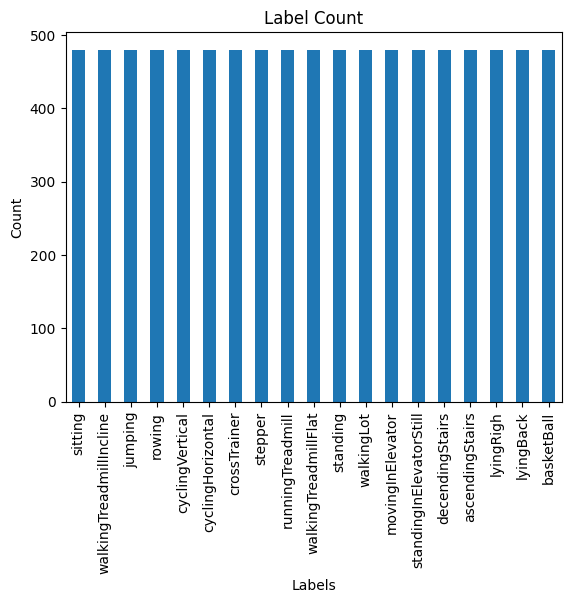

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['activity'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')

In [8]:

df_RA = df.filter(regex='RA_') 
df_LA = df.filter(regex='LA_') 

In [9]:
df_RA.insert(3, 'activity', df['activity'])

In [10]:
df_LA.insert(3, 'activity', df['activity'])


In [11]:
df_RA


,RA_xacc_mean,RA_xacc_max,RA_xacc_min,activity,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
0,0.679134,0.75930,0.58542,sitting,0.001546,0.039324,-0.415694,5.713088,5.8483,5.5956,...,-0.57428,0.000012,0.003401,-0.052190,-0.211136,-0.18401,-0.24523,0.000044,0.006638,-1.153902
1,0.644964,0.73158,0.53064,sitting,0.001333,0.036508,0.410625,5.795154,5.9546,5.6687,...,-0.57398,0.000005,0.002216,0.222740,-0.206431,-0.18054,-0.23624,0.000032,0.005660,0.458427
2,0.608212,0.67737,0.53546,sitting,0.000637,0.025244,0.153302,5.833086,5.8918,5.7656,...,-0.57563,0.000004,0.001954,-0.221765,-0.205648,-0.18342,-0.22933,0.000024,0.004868,-0.984915
3,0.591138,0.71177,0.51524,sitting,0.001349,0.036731,0.525019,5.863846,5.9645,5.7556,...,-0.57858,0.000007,0.002688,0.075011,-0.203739,-0.17999,-0.22958,0.000026,0.005099,0.185634
4,0.558168,0.67190,0.50535,sitting,0.000626,0.025020,1.076782,5.884745,5.9401,5.8384,...,-0.57996,0.000005,0.002278,-0.219440,-0.203684,-0.17904,-0.22924,0.000027,0.005175,-0.820907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.690373,30.46300,-4.90150,basketBall,47.192912,6.869710,0.650080,2.187710,41.3410,-10.1410,...,-0.89670,0.177217,0.420971,1.232819,-0.120793,0.58641,-0.61373,0.077901,0.279107,0.611462
9116,6.477090,48.54700,-9.96820,basketBall,44.135927,6.643488,1.675812,5.845459,33.7910,-48.3200,...,-0.85305,0.158099,0.397617,1.560701,-0.133269,0.51707,-0.52776,0.058400,0.241661,0.574120
9117,6.309986,27.29900,-8.43140,basketBall,57.018917,7.551087,0.108921,6.342772,27.0570,-6.6706,...,-0.83512,0.126188,0.355229,1.598340,-0.567238,-0.14483,-0.82409,0.023408,0.152998,0.598665
9118,5.020496,30.16600,-20.25100,basketBall,67.001032,8.185416,0.157547,5.824265,27.6300,-19.8830,...,-0.87361,0.174494,0.417725,0.758435,0.211566,0.67931,-0.22328,0.060114,0.245181,0.316989


In [12]:
df_LA

,LA_xacc_mean,LA_xacc_max,LA_xacc_min,activity,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,...,LA_ymag_min,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew
0,3.403317,3.4875,3.2682,sitting,0.001583,0.039790,-0.744647,-8.375713,-8.2927,-8.4821,...,0.33748,0.000003,0.001810,-0.215069,0.072273,0.076374,0.067940,0.000004,0.001910,-0.166015
1,3.427302,3.6630,3.3168,sitting,0.004305,0.065614,1.000107,-8.397591,-8.3118,-8.5017,...,0.33000,0.000017,0.004159,-0.611251,0.074557,0.085184,0.068169,0.000022,0.004643,0.717286
2,3.400870,3.5168,3.3315,sitting,0.001007,0.031732,0.978319,-8.439138,-8.3599,-8.5204,...,0.33307,0.000002,0.001316,-0.506255,0.075852,0.083227,0.072507,0.000004,0.002106,1.043919
3,3.391002,3.5311,3.2608,sitting,0.001792,0.042328,0.117935,-8.441421,-8.3207,-8.5446,...,0.33431,0.000002,0.001395,0.155251,0.074878,0.080059,0.069942,0.000006,0.002414,0.242524
4,3.359974,3.4434,3.3069,sitting,0.000633,0.025160,1.051627,-8.454854,-8.3202,-8.5561,...,0.33631,0.000001,0.001005,-0.299017,0.073398,0.077461,0.070175,0.000002,0.001482,0.606258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.834459,40.1640,-15.3980,basketBall,140.063928,11.834861,0.486128,-3.441297,39.7590,-53.6520,...,-0.87575,0.210911,0.459250,-0.421162,-0.529403,0.653000,-0.879310,0.123917,0.352018,1.813520
9116,6.647402,43.9160,-22.3060,basketBall,65.655140,8.102786,0.067916,-5.140474,26.7770,-41.9160,...,-0.77618,0.143162,0.378368,-1.307983,-0.466066,0.659650,-0.835960,0.167255,0.408968,1.483683
9117,3.108810,40.2770,-10.9500,basketBall,84.701543,9.203344,1.178224,-4.881662,43.4020,-27.3490,...,0.16648,0.035696,0.188933,-0.736037,-0.286489,0.632420,-0.837640,0.109532,0.330956,0.502392
9118,5.141190,68.5920,-43.1120,basketBall,137.860050,11.741382,1.219670,-3.365847,23.6960,-34.5820,...,-0.85130,0.205452,0.453268,0.171353,-0.567578,0.264780,-0.854420,0.059971,0.244890,1.467799


In [13]:
df_LA['activity'].value_counts()


sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: activity, dtype: int64

In [14]:
df_RA['activity'].value_counts()


sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: activity, dtype: int64

In [15]:

from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df_RA['activity'] = label_encoder.fit_transform(df_RA['activity'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
# 'label' 컬럼을 숫자로 변환
df_LA['activity'] = label_encoder.fit_transform(df_LA['activity'])

/tmp/ipykernel_115/915996628.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RA['activity'] = label_encoder.fit_transform(df_RA['activity'])
/tmp/ipykernel_115/915996628.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LA['activity'] = label_encoder.fit_transform(df_LA['activity'])


In [16]:
df_LA['activity'].value_counts()

12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: activity, dtype: int64

In [17]:
df_RA['activity'].value_counts()

12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: activity, dtype: int64

In [18]:
df_RA_Y=df_RA['activity']

In [19]:
df_RA_X=df_RA.drop('activity',axis=1)
df_RA_X.head()

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,RA_yacc_var,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
0,0.679134,0.75930,0.58542,0.001546,0.039324,-0.415694,5.713088,5.8483,5.5956,0.003779,...,-0.57428,0.000012,0.003401,-0.052190,-0.211136,-0.18401,-0.24523,0.000044,0.006638,-1.153902
1,0.644964,0.73158,0.53064,0.001333,0.036508,0.410625,5.795154,5.9546,5.6687,0.001132,...,-0.57398,0.000005,0.002216,0.222740,-0.206431,-0.18054,-0.23624,0.000032,0.005660,0.458427
2,0.608212,0.67737,0.53546,0.000637,0.025244,0.153302,5.833086,5.8918,5.7656,0.000488,...,-0.57563,0.000004,0.001954,-0.221765,-0.205648,-0.18342,-0.22933,0.000024,0.004868,-0.984915
3,0.591138,0.71177,0.51524,0.001349,0.036731,0.525019,5.863846,5.9645,5.7556,0.001423,...,-0.57858,0.000007,0.002688,0.075011,-0.203739,-0.17999,-0.22958,0.000026,0.005099,0.185634
4,0.558168,0.67190,0.50535,0.000626,0.025020,1.076782,5.884745,5.9401,5.8384,0.000471,...,-0.57996,0.000005,0.002278,-0.219440,-0.203684,-0.17904,-0.22924,0.000027,0.005175,-0.820907


In [20]:
from sklearn.model_selection import train_test_split

X_train_RA, X_test_RA, y_train_RA, y_test_RA = train_test_split(df_RA_X, 
                                                    df_RA_Y,
                                                    test_size = 0.25, 
                                                    random_state = 21)

In [21]:

df_LA_Y = df_LA['activity']
df_LA_Y.head()

0    12
1    12
2    12
3    12
4    12
Name: activity, dtype: int64

In [22]:
df_LA_X=df_LA.drop('activity',axis=1)
df_LA_X.head()

,LA_xacc_mean,LA_xacc_max,LA_xacc_min,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,LA_yacc_var,...,LA_ymag_min,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew
0,3.403317,3.4875,3.2682,0.001583,0.039790,-0.744647,-8.375713,-8.2927,-8.4821,0.001178,...,0.33748,0.000003,0.001810,-0.215069,0.072273,0.076374,0.067940,0.000004,0.001910,-0.166015
1,3.427302,3.6630,3.3168,0.004305,0.065614,1.000107,-8.397591,-8.3118,-8.5017,0.001098,...,0.33000,0.000017,0.004159,-0.611251,0.074557,0.085184,0.068169,0.000022,0.004643,0.717286
2,3.400870,3.5168,3.3315,0.001007,0.031732,0.978319,-8.439138,-8.3599,-8.5204,0.000684,...,0.33307,0.000002,0.001316,-0.506255,0.075852,0.083227,0.072507,0.000004,0.002106,1.043919
3,3.391002,3.5311,3.2608,0.001792,0.042328,0.117935,-8.441421,-8.3207,-8.5446,0.001862,...,0.33431,0.000002,0.001395,0.155251,0.074878,0.080059,0.069942,0.000006,0.002414,0.242524
4,3.359974,3.4434,3.3069,0.000633,0.025160,1.051627,-8.454854,-8.3202,-8.5561,0.001061,...,0.33631,0.000001,0.001005,-0.299017,0.073398,0.077461,0.070175,0.000002,0.001482,0.606258


In [23]:

from sklearn.model_selection import train_test_split

X_train_LA, X_test_LA, y_train_LA, y_test_LA = train_test_split(df_LA_X, 
                                                    df_LA_Y,
                                                    test_size = 0.25, 
                                                    random_state = 21)

In [24]:
X_train_RA.shape, X_test_RA.shape, y_train_RA.shape, y_test_RA.shape


((6840, 54), (2280, 54), (6840,), (2280,))

In [25]:
X_train_LA.shape, X_test_LA.shape, y_train_LA.shape, y_test_LA.shape


((6840, 54), (2280, 54), (6840,), (2280,))

In [26]:
from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)
        
        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]
        
        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가
    
    return np.array(X), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

In [27]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array_RA = np.array(y_train_RA)
train_set_RA = np.c_[X_train_RA, y_train_array_RA]

y_test_array_RA = np.array(y_test_RA)
test_set_RA = np.c_[X_test_RA, y_test_array_RA]

In [28]:
n_step = 3 

X_train_seq_RA, y_train_seq_RA = split_sequences(train_set_RA, n_step)
print(X_train_seq_RA.shape, y_train_seq_RA.shape)

X_test_seq_RA, y_test_seq_RA = split_sequences(test_set_RA, n_step)
print(X_test_seq_RA.shape, y_test_seq_RA.shape)

(6838, 3, 54) (6838,)
(2278, 3, 54) (2278,)


In [29]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array_LA = np.array(y_train_LA)
train_set_LA = np.c_[X_train_LA, y_train_array_LA]

y_test_array_LA = np.array(y_test_LA)
test_set_LA = np.c_[X_test_LA, y_test_array_LA]

In [30]:
n_step = 3 

X_train_seq_LA, y_train_seq_LA = split_sequences(train_set_LA, n_step)
print(X_train_seq_LA.shape, y_train_seq_LA.shape)

X_test_seq_LA, y_test_seq_LA = split_sequences(test_set_LA, n_step)
print(X_test_seq_LA.shape, y_test_seq_LA.shape)

(6838, 3, 54) (6838,)
(2278, 3, 54) (2278,)


In [31]:
from keras.utils import to_categorical

# Convert output variables to categorical for CNN
y_train_seq_RA = to_categorical(y_train_seq_RA)
print(y_train_seq_RA.shape)

y_test_seq_RA = to_categorical(y_test_seq_RA)
print(y_test_seq_RA.shape)

2024-09-25 02:28:19.821180: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-25 02:28:19.821254: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-25 02:28:19.821298: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-25 02:28:19.831117: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(6838, 19)
(2278, 19)


In [32]:
# Convert output variables to categorical for CNN
y_train_seq_LA = to_categorical(y_train_seq_LA)
print(y_train_seq_LA.shape)

y_test_seq_LA = to_categorical(y_test_seq_LA)
print(y_test_seq_LA.shape)

(6838, 19)
(2278, 19)


In [33]:

# Produce variables for CNN input/output shape
n_timesteps, n_features, n_outputs = X_train_seq_RA.shape[1], X_train_seq_RA.shape[2], y_train_seq_RA.shape[1]
print(n_timesteps, n_features, n_outputs)

3 54 19


In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D

In [122]:

# Build CNN model using keras. For model building suggestions, referenced:
# https://machinelearningmastery.com/deep-learning-models-for-human-activity-recognition/
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

# Sequential model type
model = Sequential()
model.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [123]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               93696     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 19)                2451      
                                                                 
Total params: 112659 (440.07 KB)
Trainable params: 112659 (440.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
history = model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)


Epoch 1/20


2024-09-25 02:28:25.980114: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-09-25 02:28:26.112727: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f3ec0237ec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-25 02:28:26.112767: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): CUDA GPU, Compute Capability 8.0
2024-09-25 02:28:26.112774: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): CUDA GPU, Compute Capability 8.0
2024-09-25 02:28:26.118369: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-25 02:28:26.206688: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


193/193 [==============================] - 3s 8ms/step - loss: 2.0460 - accuracy: 0.3525 - val_loss: 1.3291 - val_accuracy: 0.5804
Epoch 2/20
193/193 [==============================] - 1s 4ms/step - loss: 1.0198 - accuracy: 0.6763 - val_loss: 0.9415 - val_accuracy: 0.7558
Epoch 3/20
193/193 [==============================] - 1s 4ms/step - loss: 0.7301 - accuracy: 0.7793 - val_loss: 0.8359 - val_accuracy: 0.7763
Epoch 4/20
193/193 [==============================] - 1s 4ms/step - loss: 0.5811 - accuracy: 0.8308 - val_loss: 0.7341 - val_accuracy: 0.8129
Epoch 5/20
193/193 [==============================] - 1s 6ms/step - loss: 0.4646 - accuracy: 0.8669 - val_loss: 0.6560 - val_accuracy: 0.8392
Epoch 6/20
193/193 [==============================] - 1s 4ms/step - loss: 0.3855 - accuracy: 0.8872 - val_loss: 0.6483 - val_accuracy: 0.8465
Epoch 7/20
193/193 [==============================] - 1s 4ms/step - loss: 0.3250 - accuracy: 0.9053 - val_loss: 0.6503 - val_accuracy: 0.8436
Epoch 8/20
193/19

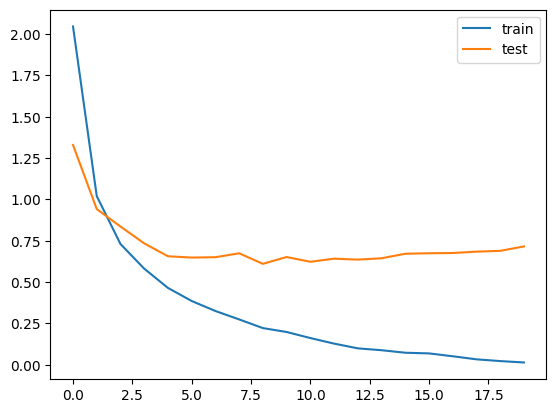

In [38]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [39]:
model.evaluate(X_train_seq_RA, y_train_seq_RA)

214/214 [==============================] - 0s 2ms/step - loss: 0.0800 - accuracy: 0.9876


[0.08003965765237808, 0.9875694513320923]

In [40]:
model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 2ms/step - loss: 0.6305 - accuracy: 0.8828


[0.6304939389228821, 0.8827919363975525]

72/72 [==============================] - 0s 1ms/step
Confusion Matrix


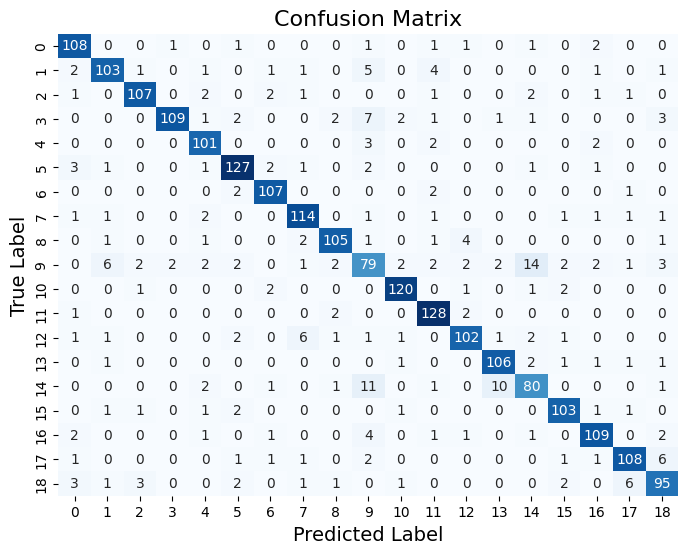

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       116
           1       0.89      0.86      0.87       120
           2       0.93      0.91      0.92       118
           3       0.97      0.84      0.90       129
           4       0.88      0.94      0.91       108
           5       0.90      0.91      0.91       139
           6       0.91      0.96      0.93       112
           7       0.89      0.92      0.90       124
           8       0.92      0.91      0.91       116
           9       0.68      0.63      0.65       126
          10       0.94      0.94      0.94       127
          11       0.88      0.96      0.92       133
          12       0.90      0.86      0.88       119
          13       0.88      0.93      0.91       114
          14       0.76      0.75      0.75       107
          15       0.91      0.93      0.92       111
          16       0.89      0.89      0.89       122
     

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 예측값과 실제값에서 argmax 사용하여 라벨 추출
y_test_arg = np.argmax(y_test_seq_RA, axis=1)
Y_pred = np.argmax(model.predict(X_test_seq_RA), axis=1)

# 혼동 행렬 출력 및 시각화
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)

# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# 축 레이블 추가
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

# 그래프 표시
plt.show()

# 분류 보고서 및 정확도 출력
print('Classification Report')
print(classification_report(y_test_arg, Y_pred))

accuracy = accuracy_score(y_test_arg, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

In [42]:
base_loss,base_accuracy=model.evaluate(X_test_seq_RA, y_test_seq_RA)

model_file='./RA_Model.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

72/72 [==============================] - 0s 2ms/step - loss: 0.6305 - accuracy: 0.8828
model saved at  ./RA_Model.h5
Accuracy >88.279194
Base Loss >0.63


/tmp/ipykernel_115/600400438.py:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, model_file, include_optimizer=False)


In [43]:

# Build CNN model using keras. For model building suggestions, referenced:
# https://machinelearningmastery.com/deep-learning-models-for-human-activity-recognition/
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

# Sequential model type
model2 = Sequential()
model2.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(n_outputs, activation='softmax'))
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [44]:
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               93696     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 19)                2451      
                                                                 
Total params: 112659 (440.07 KB)
Trainable params: 112659 (440.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
history2 = model2.fit(X_train_seq_LA, y_train_seq_LA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
193/193 [==============================] - 3s 7ms/step - loss: 1.9967 - accuracy: 0.3718 - val_loss: 1.2524 - val_accuracy: 0.5673
Epoch 2/20
193/193 [==============================] - 1s 4ms/step - loss: 0.9748 - accuracy: 0.6831 - val_loss: 0.8857 - val_accuracy: 0.7193
Epoch 3/20
193/193 [==============================] - 1s 4ms/step - loss: 0.6839 - accuracy: 0.7943 - val_loss: 0.6605 - val_accuracy: 0.8231
Epoch 4/20
193/193 [==============================] - 1s 4ms/step - loss: 0.5318 - accuracy: 0.8486 - val_loss: 0.6389 - val_accuracy: 0.8304
Epoch 5/20
193/193 [==============================] - 1s 4ms/step - loss: 0.4454 - accuracy: 0.8711 - val_loss: 0.5768 - val_accuracy: 0.8377
Epoch 6/20
193/193 [==============================] - 1s 4ms/step - loss: 0.3587 - accuracy: 0.8986 - val_loss: 0.5299 - val_accuracy: 0.8582
Epoch 7/20
193/193 [==============================] - 1s 5ms/step - loss: 0.2915 - accuracy: 0.9142 - val_loss: 0.5598 - val_accuracy: 0.8494
Epoch 

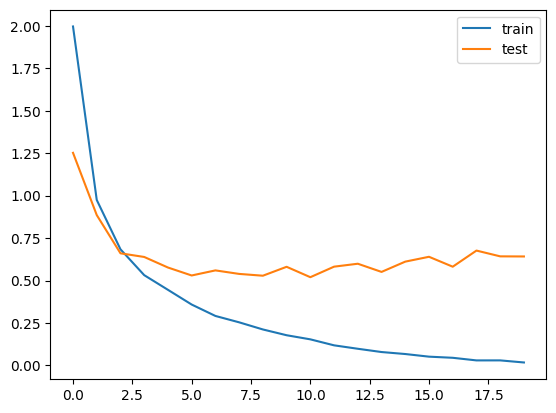

In [46]:
plt.plot(history2.history["loss"], label = "train")
plt.plot(history2.history["val_loss"], label = "test")
plt.legend()

In [47]:
model2.evaluate(X_train_seq_LA, y_train_seq_LA)

214/214 [==============================] - 1s 2ms/step - loss: 0.0747 - accuracy: 0.9873


[0.07473493367433548, 0.9872769713401794]

In [48]:
model2.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.8806


[0.5722144842147827, 0.8805969953536987]

72/72 [==============================] - 0s 1ms/step
Confusion Matrix


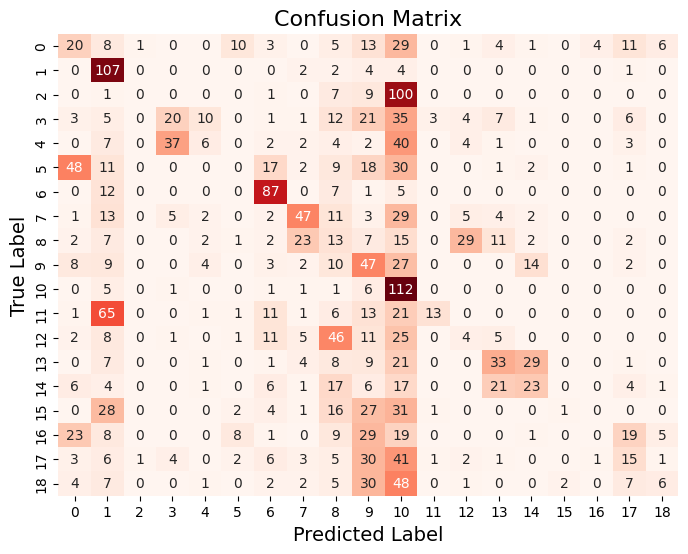

Classification Report
              precision    recall  f1-score   support

           0       0.17      0.17      0.17       116
           1       0.34      0.89      0.49       120
           2       0.00      0.00      0.00       118
           3       0.29      0.16      0.20       129
           4       0.21      0.06      0.09       108
           5       0.00      0.00      0.00       139
           6       0.54      0.78      0.64       112
           7       0.48      0.38      0.43       124
           8       0.07      0.11      0.08       116
           9       0.16      0.37      0.23       126
          10       0.17      0.88      0.29       127
          11       0.72      0.10      0.17       133
          12       0.08      0.03      0.05       119
          13       0.38      0.29      0.33       114
          14       0.31      0.21      0.25       107
          15       0.33      0.01      0.02       111
          16       0.00      0.00      0.00       122
     

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 예측값과 실제값에서 argmax 사용하여 라벨 추출
y_test_arg = np.argmax(y_test_seq_RA, axis=1)
Y_pred = np.argmax(model2.predict(X_test_seq_RA), axis=1)

# 혼동 행렬 출력 및 시각화
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)

# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False)

# 축 레이블 추가
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

# 그래프 표시
plt.show()

# 분류 보고서 및 정확도 출력
print('Classification Report')
print(classification_report(y_test_arg, Y_pred))

accuracy = accuracy_score(y_test_arg, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

In [50]:
base_loss,base_accuracy=model2.evaluate(X_test_seq_LA, y_test_seq_LA)

model_file2='./LA_Model.h5'
  
tf.keras.models.save_model(model2, model_file2, include_optimizer=False)
print('model saved at ', model_file2)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

72/72 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.8775
model saved at  ./LA_Model.h5
Accuracy >87.752414
Base Loss >0.58


/tmp/ipykernel_115/2590849169.py:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model2, model_file2, include_optimizer=False)


### 마지막 출력층을 제거하고 base모델을 저장

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

# model2가 이미 정의되어 있다고 가정하고 시작
# model2의 구조: LSTM -> Dense -> Dense

# 마지막 Dense 층 제거
model2.pop()

# 제거 후의 모델 구조 확인
print("After removing the last layer:")
model2.summary()

# 모델 컴파일 (재컴파일 필요)
# 컴파일은 훈련을 위한 것이며, 저장에는 필수적이지 않지만 모델을 사용하려면 필요
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 저장
model_file_path = './model2_without_last_layer.h5'
model2.save(model_file_path)
print(f"Model saved at {model_file_path}")

After removing the last layer:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               93696     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
Total params: 110208 (430.50 KB)
Trainable params: 110208 (430.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model saved at ./model2_without_last_layer.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 전이학습,미세조정

In [51]:
# Base 모델을 로드 (LA_Model.h5)
from tensorflow.keras.models import load_model

base_model = load_model(model_file_path)

In [53]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  2


In [54]:
base_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               93696     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
Total params: 110208 (430.50 KB)
Trainable params: 110208 (430.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### pre-train모델에 다른 출력층을 붙여사용

In [55]:

# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

# 새로운 모델을 정의
new_model = Sequential()

# 기존 모델을 추가
new_model.add(base_model)

# 새로운 완전연결층 추가
new_model.add(layers.Dense(64, activation='relu'))  # 기존 출력층 앞의 레이어 대신 추가

# 최종 출력층 추가 (예: 10개의 클래스)
new_model.add(layers.Dense(19, activation='softmax'))

new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 128)               110208    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 19)                1235      
                                                                 
Total params: 119699 (467.57 KB)
Trainable params: 9491 (37.07 KB)
Non-trainable params: 110208 (430.50 KB)
_________________________________________________________________


In [56]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.sequential.Sequential object...,sequential_1,False
1,<keras.src.layers.core.dense.Dense object at 0...,dense_4,True
2,<keras.src.layers.core.dense.Dense object at 0...,dense_5,True


In [57]:
history3 = new_model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
193/193 [==============================] - 2s 5ms/step - loss: 2.2074 - accuracy: 0.3339 - val_loss: 1.6896 - val_accuracy: 0.4751
Epoch 2/20
193/193 [==============================] - 1s 3ms/step - loss: 1.5942 - accuracy: 0.5019 - val_loss: 1.5177 - val_accuracy: 0.5219
Epoch 3/20
193/193 [==============================] - 1s 3ms/step - loss: 1.4531 - accuracy: 0.5387 - val_loss: 1.4434 - val_accuracy: 0.5307
Epoch 4/20
193/193 [==============================] - 1s 3ms/step - loss: 1.3717 - accuracy: 0.5647 - val_loss: 1.3891 - val_accuracy: 0.5541
Epoch 5/20
193/193 [==============================] - 1s 3ms/step - loss: 1.3208 - accuracy: 0.5801 - val_loss: 1.3944 - val_accuracy: 0.5599
Epoch 6/20
193/193 [==============================] - 1s 3ms/step - loss: 1.2769 - accuracy: 0.5884 - val_loss: 1.3734 - val_accuracy: 0.5599
Epoch 7/20
193/193 [==============================] - 1s 3ms/step - loss: 1.2432 - accuracy: 0.5996 - val_loss: 1.3470 - val_accuracy: 0.5804
Epoch 

In [58]:
new_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 2ms/step - loss: 1.2304 - accuracy: 0.6089


[1.2304128408432007, 0.6088674068450928]

In [59]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [60]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.sequential.Sequential object...,sequential_1,True
1,<keras.src.layers.core.dense.Dense object at 0...,dense_4,True
2,<keras.src.layers.core.dense.Dense object at 0...,dense_5,True


In [61]:
history3 = new_model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
193/193 [==============================] - 3s 7ms/step - loss: 0.8430 - accuracy: 0.7382 - val_loss: 0.9036 - val_accuracy: 0.7310
Epoch 2/20
193/193 [==============================] - 1s 4ms/step - loss: 0.5607 - accuracy: 0.8320 - val_loss: 0.7659 - val_accuracy: 0.7661
Epoch 3/20
193/193 [==============================] - 1s 4ms/step - loss: 0.4345 - accuracy: 0.8653 - val_loss: 0.6630 - val_accuracy: 0.8026
Epoch 4/20
193/193 [==============================] - 1s 4ms/step - loss: 0.3413 - accuracy: 0.9012 - val_loss: 0.6149 - val_accuracy: 0.8231
Epoch 5/20
193/193 [==============================] - 1s 5ms/step - loss: 0.2749 - accuracy: 0.9157 - val_loss: 0.6315 - val_accuracy: 0.8216
Epoch 6/20
193/193 [==============================] - 1s 4ms/step - loss: 0.2174 - accuracy: 0.9339 - val_loss: 0.6618 - val_accuracy: 0.8216
Epoch 7/20
193/193 [==============================] - 1s 5ms/step - loss: 0.1785 - accuracy: 0.9438 - val_loss: 0.6400 - val_accuracy: 0.8319
Epoch 

In [62]:

new_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 2ms/step - loss: 0.8101 - accuracy: 0.8494


[0.8101046681404114, 0.8494293093681335]

# RA모델을 LA데이터로 학습

In [124]:
import tensorflow as tf
from tensorflow.keras.models import Sequential


# 마지막 Dense 층 제거
model.pop()

# 제거 후의 모델 구조 확인
print("After removing the last layer:")
model.summary()

# 컴파일은 훈련을 위한 것이며, 저장에는 필수적이지 않지만 모델을 사용하려면 필요
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 저장
model1_file_path = './model1_without_last_layer.h5'
model.save(model1_file_path)
print(f"Model saved at {model1_file_path}")

After removing the last layer:
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               93696     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
Total params: 110208 (430.50 KB)
Trainable params: 110208 (430.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model saved at ./model1_without_last_layer.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [125]:
# Base 모델을 로드 (RA_Model.h5)
from tensorflow.keras.models import load_model

base_model = load_model(model1_file_path)

In [126]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  2


In [134]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [137]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.sequential.Sequential object...,sequential_5,False
1,<keras.src.layers.core.dense.Dense object at 0...,dense_12,True
2,<keras.src.layers.core.dense.Dense object at 0...,dense_13,True


In [136]:

# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

# 새로운 모델을 정의
new_model = Sequential()

# 기존 모델을 추가
new_model.add(base_model)

# 새로운 완전연결층 추가
new_model.add(layers.Dense(64, activation='relu'))  # 기존 출력층 앞의 레이어 대신 추가

# 최종 출력층 추가 (예: 10개의 클래스)
new_model.add(layers.Dense(19, activation='softmax'))

new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 128)               110208    
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 19)                1235      
                                                                 
Total params: 119699 (467.57 KB)
Trainable params: 9491 (37.07 KB)
Non-trainable params: 110208 (430.50 KB)
_________________________________________________________________


In [138]:
history3 = new_model.fit(X_train_seq_LA, y_train_seq_LA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
193/193 [==============================] - 2s 6ms/step - loss: 2.8678 - accuracy: 0.1186 - val_loss: 2.7742 - val_accuracy: 0.1579
Epoch 2/20
193/193 [==============================] - 1s 3ms/step - loss: 2.6594 - accuracy: 0.1956 - val_loss: 2.6006 - val_accuracy: 0.2061
Epoch 3/20
193/193 [==============================] - 1s 3ms/step - loss: 2.5069 - accuracy: 0.2309 - val_loss: 2.5143 - val_accuracy: 0.2105
Epoch 4/20
193/193 [==============================] - 1s 3ms/step - loss: 2.4135 - accuracy: 0.2517 - val_loss: 2.4548 - val_accuracy: 0.2266
Epoch 5/20
193/193 [==============================] - 1s 3ms/step - loss: 2.3459 - accuracy: 0.2670 - val_loss: 2.4236 - val_accuracy: 0.2456
Epoch 6/20
193/193 [==============================] - 1s 5ms/step - loss: 2.2985 - accuracy: 0.2814 - val_loss: 2.4029 - val_accuracy: 0.2310
Epoch 7/20
193/193 [==============================] - 1s 3ms/step - loss: 2.2614 - accuracy: 0.2915 - val_loss: 2.3752 - val_accuracy: 0.2456
Epoch 

In [139]:
new_model.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 2ms/step - loss: 2.1766 - accuracy: 0.3033


[2.176631450653076, 0.3033362627029419]

In [140]:

# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = True

# 새로운 모델을 정의
new_model = Sequential()

# 기존 모델을 추가
new_model.add(base_model)

# 새로운 완전연결층 추가
new_model.add(layers.Dense(64, activation='relu'))  # 기존 출력층 앞의 레이어 대신 추가

# 최종 출력층 추가 (예: 10개의 클래스)
new_model.add(layers.Dense(19, activation='softmax'))

new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 128)               110208    
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 19)                1235      
                                                                 
Total params: 119699 (467.57 KB)
Trainable params: 119699 (467.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [143]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.sequential.Sequential object...,sequential_5,True
1,<keras.src.layers.core.dense.Dense object at 0...,dense_14,True
2,<keras.src.layers.core.dense.Dense object at 0...,dense_15,True


In [141]:
history3 = new_model.fit(X_train_seq_LA, y_train_seq_LA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
193/193 [==============================] - 3s 6ms/step - loss: 1.9791 - accuracy: 0.3606 - val_loss: 1.2409 - val_accuracy: 0.5775
Epoch 2/20
193/193 [==============================] - 1s 4ms/step - loss: 0.9820 - accuracy: 0.6861 - val_loss: 0.8682 - val_accuracy: 0.7471
Epoch 3/20
193/193 [==============================] - 1s 4ms/step - loss: 0.7051 - accuracy: 0.7829 - val_loss: 0.7399 - val_accuracy: 0.7924
Epoch 4/20
193/193 [==============================] - 1s 4ms/step - loss: 0.5477 - accuracy: 0.8430 - val_loss: 0.6553 - val_accuracy: 0.8114
Epoch 5/20
193/193 [==============================] - 1s 7ms/step - loss: 0.4494 - accuracy: 0.8728 - val_loss: 0.6205 - val_accuracy: 0.8333
Epoch 6/20
193/193 [==============================] - 1s 4ms/step - loss: 0.3761 - accuracy: 0.8955 - val_loss: 0.5934 - val_accuracy: 0.8465
Epoch 7/20
193/193 [==============================] - 1s 5ms/step - loss: 0.3200 - accuracy: 0.9023 - val_loss: 0.6318 - val_accuracy: 0.8246
Epoch 

In [142]:
new_model.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 2ms/step - loss: 0.7322 - accuracy: 0.8692


[0.7322154641151428, 0.8691834807395935]

# LA모델을 RA데이터로 학습

In [145]:
# Base 모델을 로드 (RA_Model.h5)
from tensorflow.keras.models import load_model

base_model = load_model(model_file_path)

In [146]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  2


In [147]:
base_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               93696     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
Total params: 110208 (430.50 KB)
Trainable params: 110208 (430.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [148]:

# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

# 새로운 모델을 정의
new_model = Sequential()

# 기존 모델을 추가
new_model.add(base_model)

# 새로운 완전연결층 추가
new_model.add(layers.Dense(64, activation='relu'))  # 기존 출력층 앞의 레이어 대신 추가

# 최종 출력층 추가 (예: 10개의 클래스)
new_model.add(layers.Dense(19, activation='softmax'))

new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 128)               110208    
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 19)                1235      
                                                                 
Total params: 119699 (467.57 KB)
Trainable params: 9491 (37.07 KB)
Non-trainable params: 110208 (430.50 KB)
_________________________________________________________________


In [149]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.sequential.Sequential object...,sequential_5,False
1,<keras.src.layers.core.dense.Dense object at 0...,dense_16,True
2,<keras.src.layers.core.dense.Dense object at 0...,dense_17,True


In [150]:
history3 = new_model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
193/193 [==============================] - 3s 5ms/step - loss: 2.8570 - accuracy: 0.1155 - val_loss: 2.7563 - val_accuracy: 0.1462
Epoch 2/20
193/193 [==============================] - 1s 3ms/step - loss: 2.6661 - accuracy: 0.1839 - val_loss: 2.6307 - val_accuracy: 0.1813
Epoch 3/20
193/193 [==============================] - 1s 3ms/step - loss: 2.5307 - accuracy: 0.2239 - val_loss: 2.5313 - val_accuracy: 0.2164
Epoch 4/20
193/193 [==============================] - 1s 3ms/step - loss: 2.4419 - accuracy: 0.2502 - val_loss: 2.4624 - val_accuracy: 0.2339
Epoch 5/20
193/193 [==============================] - 1s 3ms/step - loss: 2.3868 - accuracy: 0.2576 - val_loss: 2.4225 - val_accuracy: 0.2339
Epoch 6/20
193/193 [==============================] - 1s 3ms/step - loss: 2.3370 - accuracy: 0.2725 - val_loss: 2.3882 - val_accuracy: 0.2471
Epoch 7/20
193/193 [==============================] - 1s 3ms/step - loss: 2.3000 - accuracy: 0.2782 - val_loss: 2.3506 - val_accuracy: 0.2661
Epoch 

In [151]:
new_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 2ms/step - loss: 2.2241 - accuracy: 0.2998


[2.224099636077881, 0.29982441663742065]

### 기존 모델부터 학습

In [152]:

# 기존 모델의 층부터 학습
base_model.trainable = True

# 새로운 모델을 정의
new_model = Sequential()

# 기존 모델을 추가
new_model.add(base_model)

# 새로운 완전연결층 추가
new_model.add(layers.Dense(64, activation='relu'))  # 기존 출력층 앞의 레이어 대신 추가

# 최종 출력층 추가 (예: 10개의 클래스)
new_model.add(layers.Dense(19, activation='softmax'))

new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 128)               110208    
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 19)                1235      
                                                                 
Total params: 119699 (467.57 KB)
Trainable params: 119699 (467.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [153]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.sequential.Sequential object...,sequential_5,True
1,<keras.src.layers.core.dense.Dense object at 0...,dense_18,True
2,<keras.src.layers.core.dense.Dense object at 0...,dense_19,True


In [154]:
history3 = new_model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
193/193 [==============================] - 3s 7ms/step - loss: 2.0995 - accuracy: 0.3315 - val_loss: 1.3772 - val_accuracy: 0.5673
Epoch 2/20
193/193 [==============================] - 1s 4ms/step - loss: 1.0777 - accuracy: 0.6566 - val_loss: 1.0145 - val_accuracy: 0.7281
Epoch 3/20
193/193 [==============================] - 1s 5ms/step - loss: 0.7736 - accuracy: 0.7746 - val_loss: 0.8008 - val_accuracy: 0.7851
Epoch 4/20
193/193 [==============================] - 1s 4ms/step - loss: 0.6077 - accuracy: 0.8214 - val_loss: 0.7467 - val_accuracy: 0.8114
Epoch 5/20
193/193 [==============================] - 1s 5ms/step - loss: 0.4953 - accuracy: 0.8538 - val_loss: 0.7031 - val_accuracy: 0.8099
Epoch 6/20
193/193 [==============================] - 1s 4ms/step - loss: 0.4207 - accuracy: 0.8781 - val_loss: 0.6783 - val_accuracy: 0.8216
Epoch 7/20
193/193 [==============================] - 1s 5ms/step - loss: 0.3534 - accuracy: 0.9015 - val_loss: 0.6298 - val_accuracy: 0.8377
Epoch 

In [155]:
new_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 2ms/step - loss: 0.7186 - accuracy: 0.8600


[0.7186160683631897, 0.859964907169342]

1. 파인 튜닝(Fine-tuning)

- 파인 튜닝은 이미 다른 데이터셋(보통 크고 일반적인 데이터셋)으로 사전 훈련된 모델을 가져와서, 보다 작은 데이터셋이나 특정 작업에 맞게 추가적으로 조정하는 과정입니다.
- 적은 데이터로 효과적: 새로운 작업에 대해 충분한 데이터가 없는 경우에도, 이미 학습된 가중치를 바탕으로 좋은 성능을 달성할 수 있습니다.
- 일반적으로 광범위한 데이터에서 학습된 모델은 다양한 특성을 이미 인식하고 있어(이미 학습된 가중치가 있기떄문에 ), 세부적인 최적화(이후의 모델로 최적화를 진행)만으로도 높은 성능을 발휘할 수 있습니다.

2. 모델을 처음부터 작성
- 모델이 특정 데이터셋에 완벽하게 최적화되도록 학습될 수 있어, 해당 데이터에 대해 최적의 성능을 발휘할 수 있습니다.
- 크고 복잡한 모델을 충분히 학습시키기 위해서는 상당한 양의 레이블이 지정된 훈련 데이터와 계산 자원이 필요합니다.
- 특히 훈련 데이터가 제한적인 경우, 모델이 훈련 데이터에 과적합될 수 있습니다.